In [3]:
##Import and display all four datsets used in the Supervised Learning Model 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

dImport = pd.read_excel("ImportsPerCountry.xlsx", sheet_name='REPORT')
dExport = pd.read_excel("ExportsPerCountry.xlsx", sheet_name='REPORT')
dCensus = pd.read_csv("World Census.csv")
dGDP=pd.read_excel("GDP.xlsx", sheet_name= 'All Countries and Economies GDP')

# Access all column names (headings)
column_headings1 = dImport.columns.tolist()
column_headings2 = dExport.columns.tolist()
column_headings3 = dCensus.columns.tolist()
column_headings4 = dGDP.columns.tolist()

# The DataFrame 'df' now contains all your data, including column headings
#print("Column Headings:", column_headings1)
#print("Column Headings:", column_headings2)
#print("Column Headings:", column_headings3)
#print("Column Headings:", column_headings4)
#print("Data Preview:")

#print(dImport.head())
#print(dExport.head())
#print(dCensus.head())
#print(dGDP.head())

In [4]:
import pandas as pd

# Load the original data
data = pd.read_csv("World Census.csv")

#print(data["Total Population"].dtypes)

# Inspect the column to ensure it is consistent
#print(data["Total Population"].head())  # View the first few rows of "Total Population"

data["Total Population"] = data["Total Population"].str.strip()
data["Total Population"] = data["Total Population"].str.replace(",", "")
data["Total Population"] = data["Total Population"].replace(["N/A", "Unknown", "?"], None)

data["Total Population"] = pd.to_numeric(data["Total Population"], errors="coerce")
data["Total Population"] = data["Total Population"].fillna(0)  # Replace NaN with 0 or another defau

#print("After cleaning:")
#print(data["Total Population"].dtypes)

# Pivot the data (transpose)
pivoted_data = data.pivot(index="Country", columns="Year", values="Total Population")

# Reset the index for clarity
pivoted_data.reset_index(inplace=True)

# Add "_Population" suffix to all columns except 'Country'
pivoted_data = pivoted_data.rename(columns=lambda x: f"{x}_Population" if x != "Country" else x)

# Save the transformed data to a new CSV file
pivoted_data.to_csv("pivoted_data.csv", index=False)

# Print the transformed data for verification
print(pivoted_data) 
data.info()

Year      Country  1992_Population  1993_Population  1994_Population  \
0     Afghanistan         15303331         17343318         18898986   
1         Albania          3072011          3066284          3111161   
2         Andorra            59722            62559            63826   
3       Argentina         33966873         34407178         34846915   
4         Armenia          3508953          3328558          3198062   
..            ...              ...              ...              ...   
150       Uruguay          3144763          3164985          3186003   
151    Uzbekistan         21609643         22127596         22603815   
152       Vanuatu           161472           165198           168862   
153        Zambia          8091433          8325745          8566929   
154      Zimbabwe         10694577         10966865         11103347   

Year  1995_Population  1996_Population  1997_Population  1998_Population  \
0            19947348         20723726         21514488    

In [6]:
## Merge 4 datasets (Import, Export, World Census and GDP)
##Calculate Trade Balance (Exports minus Imports) for the countries in the dataset and add a new column with Trade Balance values
##Predict CAGR for 

export_data = pd.read_excel("ExportsPerCountry.xlsx", sheet_name='REPORT')
import_data = pd.read_excel("ImportsPerCountry.xlsx", sheet_name='REPORT')
New_data = pd.read_csv("pivoted_data.csv") 

# Define the year range
year_range = [str(year) for year in range(1992, 2024)]

# Drop rows with missing or invalid data for the Export and Import datasets
import_data = import_data.dropna(subset=year_range)
export_data = export_data.dropna(subset=year_range)

# Merge the Import and Export datasets first based on 'Country'
merged_data = pd.merge(import_data, export_data, on='Country', suffixes=('_Imports', '_Exports'), how='outer')


# Merge the result with the Census data based on 'Coutry'    
final_merged_data = pd.merge(merged_data, New_data, on='Country', how='outer')


# Calculate Trade Balance for each year and add a new column
for year in year_range:
    # Check if the Export and Import columns for the year exist
    if f"{year}_Exports" in final_merged_data.columns and f"{year}_Imports" in final_merged_data.columns:
        final_merged_data[f"{year}_Trade_Balance"] = final_merged_data[f"{year}_Exports"] - final_merged_data[f"{year}_Imports"]


for year in year_range:
    # Define column names dynamically
    trade_balance_col = f"{year}_Trade_Balance"
    population_col = f"{year}_Population"
    per_capita_trade_balance_col = f"{year}_Per_Capita_Trade_Balance"

    if trade_balance_col in final_merged_data.columns and population_col in final_merged_data.columns:
        # Perform the division, handling missing or zero population values
             final_merged_data[per_capita_trade_balance_col] = (final_merged_data[trade_balance_col] / final_merged_data[population_col]
    ).replace([float('inf'), -float('inf')], None).fillna(1).replace(0, 1)
  # Replace infinities 
            
## Calculate CAGR for the countries in the  dataset and add a new column with CAGR score 

GDP_data = pd.read_excel("GDP.xlsx", sheet_name='All Countries and Economies GDP')

GDP_data.rename(columns={2004: '2004', 2023: '2023'}, inplace=True)

# Drop rows with missing or invalid data
GDP_data = GDP_data.dropna(subset=['2004','2023'])
GDP_data = GDP_data[GDP_data['2004'] > 0]

# Calculate the CAGR for each country
GDP_data['CAGR_2004_to_2023'] = ((GDP_data['2023'] / GDP_data['2004']) **(1 / (2023 - 2004)) - 1) * 100

#Extract only the CAGR column from this dataset
GDP_data = GDP_data[['Country', 'CAGR_2004_to_2023']]
print(GDP_data)

print(GDP_data['CAGR_2004_to_2023'].dtype)

#Merge the CAGR Column to the already merged 3 datsets:
merged_four_datasets = pd.merge(final_merged_data, GDP_data, on='Country', how='left')
print(merged_four_datasets)

          Country  CAGR_2004_to_2023
0     Afghanistan           6.482473
1         Albania           6.446949
2         Andorra           1.411278
3       Argentina           7.460133
4         Armenia          10.559000
..            ...                ...
149       Uruguay           4.406618
150    Uzbekistan           3.545059
151       Vanuatu           4.726415
152  South Africa           8.152493
153        Zambia           9.954971

[146 rows x 2 columns]
float64
         Country  1992_Imports  1993_Imports  1994_Imports  1995_Imports  \
0    Afghanistan  2.260056e+06  2.792924e+06  6.071612e+06  5.382048e+06   
1        Albania  5.198037e+06  7.538701e+06  6.125965e+06  9.490064e+06   
2        Andorra  5.910900e+04  1.443650e+05  1.179700e+05  2.438850e+05   
3      Argentina  1.256366e+09  1.205720e+09  1.725380e+09  1.760869e+09   
4        Armenia  1.449969e+06  7.281170e+05  9.708290e+05  1.618676e+07   
..           ...           ...           ...           ...          

(155, 32)
(155,)
Mean Squared Error: 6.9606537278087375
R² Score: -0.017945468925368413


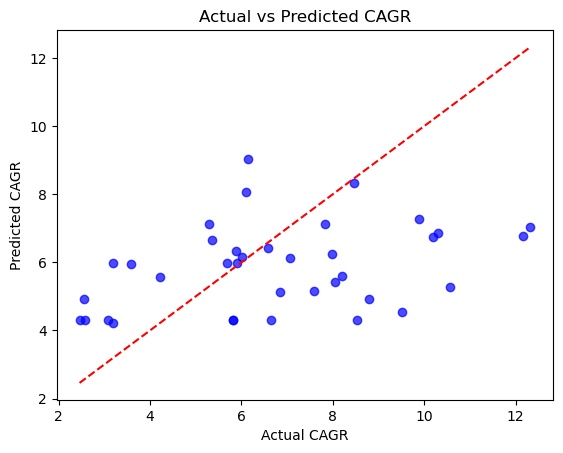

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Select the data for regression
X = merged_four_datasets[[f"{year}_Per_Capita_Trade_Balance" for year in range(1992, 2024)]]  # Features
y = merged_four_datasets["CAGR_2004_to_2023"].values  # Target

print(X.shape)
print(y.shape)

# Remove missing or NaN values
valid_indices = ~pd.isna(X).any(axis=1) & ~pd.isna(y)
X = X[valid_indices]  # Reshape to 2D array for regression
y = y[valid_indices]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Plot actual vs predicted
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect prediction line
plt.title("Actual vs Predicted CAGR")
plt.xlabel("Actual CAGR")
plt.ylabel("Predicted CAGR")
plt.show()